<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/classification_041323_iris_pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest NEighbors

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
# train/ test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)


(120, 4)
(30, 4)
(120,)
(120,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
#모델 만들기
from sklearn.neighbors import KNeighborsClassifier 
for i in (1,3,5,7):
    for j in ('uniform','distance'):
        for k in ('auto','ball_tree','kd_tree','brute'):
            model = KNeighborsClassifier(n_neighbors=i, weights=j,algorithm=k)
            model.fit(X_train,y_train)
            y_p = model.predict(X_test)
            relation_square = model.score(X_test,y_test)
            from sklearn.metrics import confusion_matrix, classification_report
            knn_matrix = confusion_matrix(y_test,y_p)
            print(knn_matrix)
            target_names = ['setosa','versicolor','virginica']
            knn_result = classification_report(y_test,y_p,target_names=target_names)
            print(knn_result)
    print('\n')
print('\n')
            

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor      

In [38]:
print('accuracy : {:.2f}'.format(knn.score(X_test,y_test)))

accuracy : 1.00


In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print('accuracy : {:.2f}'.format(DT.score(X_test,y_test)))

accuracy : 1.00


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

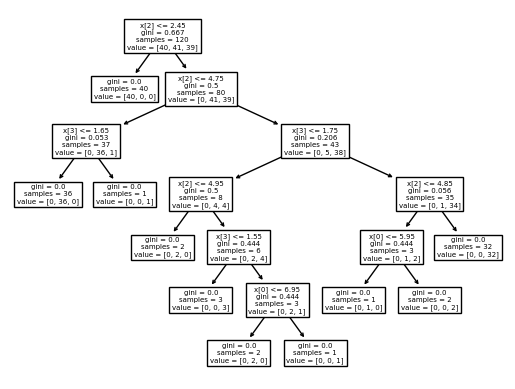

In [40]:
from sklearn import tree
tree.plot_tree(DT)

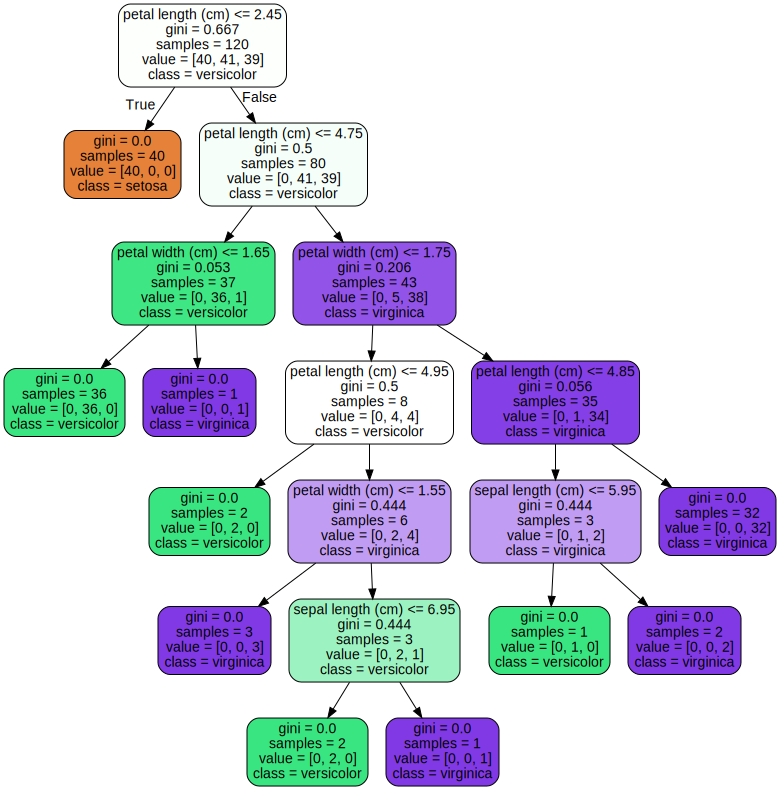

In [41]:
from sklearn.tree import export_graphviz
from graphviz import Source 
export_graphviz(DT, #모델
                out_file='iris_tree.dot', #저장경로 설정
                feature_names=iris.feature_names, #변수명
                class_names=iris.target_names, #종속변수
                rounded= True,
                filled=True)
Source.from_file('iris_tree.dot')

In [ ]:

- 결론
  - KNN의 장단점 그리고 언제 활용을 해야하는지 다음과 같이 심플하게 정리해 보았습니다.

- 장점

  - 쉬운 모델, 쉬운 알고리즘과 이해 (입문자가 샘플데이터를 활용할 때 좋음)
  - 튜닝할 hyperparameter 스트레스가 없음
  - 초기 시도해보기 좋은 시작점이 되는 모델
- 단점

  - 샘플 데이터가 늘어나면 예측시간도 늘어나기 때문에 매우 느려짐
  - pre-processing을 잘하지 않으면 좋은 성능을 기대하기 어려움
  - feature가 많은(수 백개 이상) 데이터셋에서는 좋은 성능을 기대하기 어려움
  - feature의 값이 대부분 0인 데이터셋과는 매우 안좋은 성능을 냄
  - 결론, kaggle과 현업에서는 더 좋은 대안들이 많기 때문에 자주 쓰이는 알고리즘은 아닙니다. 하지만, 초기에 학습을 목표로 해볼 필요는 있습니다!

In [1]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 실습 데이터 https://foss4g.tistory.com/1312

In [ ]:
#Pima Indians Diabetes Database
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
Predict the onset of diabetes based on diagnostic measures

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

This is a lab test to check how your body handles the sugar. Normal person (2 hr after glucose test) should have less than 140mg/dl

Blood Pressure: Diastolic blood pressure (mm Hg).

Normal values are less than 80. Stage 1 hypertension: 80-89 Stage 2 hypertension: 90 or more Hypertensive crisis: 120 or more

Skin Thickness: Triceps skin fold thickness (mm)

For adults the normal values are 2.5 mm for men; 18 mm for women

Insulin: 2-Hour serum insulin (mu U/ml). Insulin is a hormone that helps move blood sugar.

150 mu U/ml is a critical number, in which most people with type 1 or 2 needs insulin theraphy

BMI: Body mass index (weight in kg/(height in m)^2): Assess if a person is overweight or underweight.

Underweight: less than 18.5 Normal weight: 18.5 - 24.9 Overweight: 25-29.9 Obese: over 30.0

Diabetes pedigree function: Provides some information on the history in relatives. This is a measure of genetic influence.

Age (years)

Target variable: Outcome 1 indicates having diabetes; 0 indicates not having diabetes.

In [2]:
import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
from matplotlib import pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# !pip install missingno
import missingno as msno

#For ML
from datetime import date
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#For Warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [10]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Pregnancies,768.00,3.85,3.37,0.00,0.00,0.00,3.00,10.00,13.00,17.00,17.00
Glucose,768.00,120.89,31.97,0.00,0.00,79.00,117.00,181.00,196.00,199.00,199.00
BloodPressure,768.00,69.11,19.36,0.00,0.00,38.70,72.00,90.00,106.00,122.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,0.00,23.00,44.00,51.33,99.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,0.00,30.50,293.00,519.90,846.00,846.00
BMI,768.00,31.99,7.88,0.00,0.00,21.80,32.00,44.39,50.76,67.10,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.08,0.14,0.37,1.13,1.70,2.42,2.42
Age,768.00,33.24,11.76,21.00,21.00,21.00,29.00,58.00,67.00,81.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00


In [16]:
df['Glucose'].value_counts(sort=True)

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [17]:
df['Glucose'].unique() #0이 있음 -> 이상치

#glucose 이상치 범위 얼마인지 알아보기 

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [ ]:
# 참고논문
https://koreascience.kr/article/JAKO202131559472408.pdf
IQR 기법을 이용한 이상치 처리와 피어슨 상관관계 분석을 적용하고 설명한다. 분석한 데이터로 Decision Tree, Random
Forest, KNN, SVM 기법[9][10]과 선행 연구에서 주로 사용하지 않았던 앙상블 기법인 XGBoost, Voting, Stacking
머신러닝 기법을 사용하여 모델별 당뇨병 예측 성능을 비교

In [ ]:
#상관관계 분석
#피어슨 상관게수로 각각 feature가 당뇨병 여부와 어떤 관계를 갖고 있는지 분석
#각 vector의 표본평균 A를 구해서 A의 0이 아닌 각 원소에 빼주어 normalization하고,
#normalized된 vector들 사이의 cosine similarity를 계산한다.

#피어슨 상관계수가 similarity로 쓰이는 예로는 추천 시스템이 있음

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>r</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>X</mi>
      <mi>Y</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <munderover>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mi>i</mi>
        <mi>n</mi>
      </munderover>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>X</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mover>
          <mi>X</mi>
          <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
        </mover>
      </mrow>
      <mo stretchy="false">)</mo>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>Y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mover>
          <mi>Y</mi>
          <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
        </mover>
      </mrow>
      <mo stretchy="false">)</mo>
    </mrow>
    <mrow>
      <msqrt>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mi>i</mi>
          <mi>n</mi>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>X</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>X</mi>
            <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
          </mover>
        </mrow>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </msqrt>
      <msqrt>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mi>i</mi>
          <mi>n</mi>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>Y</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>Y</mi>
            <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
          </mover>
        </mrow>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </msqrt>
    </mrow>
  </mfrac>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>r</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>X</mi>
      <mi>Y</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <munderover>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mi>i</mi>
        <mi>n</mi>
      </munderover>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>X</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mover>
          <mi>X</mi>
          <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
        </mover>
      </mrow>
      <mo stretchy="false">)</mo>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>Y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mover>
          <mi>Y</mi>
          <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
        </mover>
      </mrow>
      <mo stretchy="false">)</mo>
    </mrow>
    <mrow>
      <msqrt>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mi>i</mi>
          <mi>n</mi>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>X</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>X</mi>
            <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
          </mover>
        </mrow>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </msqrt>
      <msqrt>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mi>i</mi>
          <mi>n</mi>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>Y</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>Y</mi>
            <mo stretchy="false">&#x00AF;<!-- ¯ --></mo>
          </mover>
        </mrow>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </msqrt>
    </mrow>
  </mfrac>
</math>

[피어슨 상관계수, Pearson product-moment correlation coeffcient](https://itwiki.kr/w/%ED%8C%8C%EC%9D%BC:%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.png)


</figure>
<img src = https://itwiki.kr/images/4/4f/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.png >
</figure>

- 두 변수 간의 선형 상관관계를 계량화한 수치
- -1부터 1의 값을 가짐
- 1은 완벽한 양의 상관관계, 0은 상관관계가 없음, -1은 완벽한 음의 선형 상환관계

 - 양의 상관관계: 한 변수의 값이 증가할 때 다른 변수의 값도 증가하는 경향
 - 음의 상관관계: 한 변수의 값이 증가할 때 다른 변수의 값이 감소하는 경향

</figure>
 <img src = https://blog.kakaocdn.net/dn/cjy6l3/btqFMHmqPmH/FzOy23oqydqxWAkpbt1zgK/img.png, height=200>
</figure>


| 피어슨 상관계수 R | 상관관계 정도 |
|:---:|:----:| 
| ±0.9 이상 | 매우 높은 상관관계 | 
| ±0.9 ~ ±0.7 | 매우 높은 상관관계 | 
| ±0.7 ~ ±0.4 | 높은 상관관계 | 
| ±0.4 ~ ±0.2 | 낮은 상관관계 |
| ±0.2 미만 | 샹관관계 없음 | 


##### pandas corr함수
- df.corr(method='pearson', 'kendall', 'spearman', min_periods=1)
 - peason : standard correlation coefficient
 - kendal : Kendall Tau correlation coefficient
 - spearman  Spearman rank correlation

 - min_period: int, optional: Mininum # of obsevations required per pari of columns to have a valied result. Currently only available for Pearson & Spearman correlation.

In [20]:
corr_pearson = df.corr(method='pearson')
corr_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


#### IQR 
이상치를 탐색하기 위해 IQR 방법을사용. 
IQR방법은 전체 데이터를 오름차순으로 정렬한 후 25%, 50%, 75%, 100%로 4등분 
여기서 25%와 75% 사이의 값을 IQR (Interquartile Range)라고 한다. 

이상치는 다른 데이터들에 비해 아주 큰 값이나 작은 값을 갖는 데이터를 말하며 통계적으로는 1.5IQR을 벗어나면 이상치로 판단한다.[12] 

이상치 데이터가 포함될 경우 왜곡된 분석 결과를 얻게 되므로 정확한
결과의 도출을 위해 데이터 분석하기 전에 이상치를 제거하는 과정이 필수적이다.[13] 
즉, 이상치 데이터는 모델의 성능에 악영향을 미친다.

In [25]:
#describe이용

Q1 = df.describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
Q3 = df.describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%

IQR = Q3 - Q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
Q2 = df.describe()['50%']  # Q2 (중앙값) 백분위수 50%

print("Q1  :",Q1)
print("Q3  :",Q3)
print("IQR :",IQR)
print("Q2  :",Q2)

KeyError: ignored

In [ ]:
# quantile 은 수치 데이터를 크기 순서로 정렬했을 때 0% ~ 100% (0 ~ 1) 위치에 해당하는 숫자를 리턴해 준다.
 